In [1]:
import jax
import jax.numpy as jnp
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# a = jnp.ones(7500).reshape(3,2500)
# b = {'A':jnp.ones(2500), 'B':jnp.ones(2500), 'C':jnp.ones(2500)}
# c = np.ones(7500).reshape(3,2500)
# d = [jnp.ones(2500), jnp.ones(2500), jnp.ones(2500)]
from env import *
def render_wall(grid_size, wall_maze):
    fig, ax = plt.subplots(figsize=(3,3),frameon=True)
    ax.grid(visible=True)
    ax.set_xlim(0,grid_size)
    ax.set_ylim(grid_size,0)
    wall_loc = np.where(wall_maze==1)
    for i in range(len(wall_loc[0])):
        r, c, a = wall_loc[0][i], wall_loc[1][i], wall_loc[2][i] # already in matrix coordinates
        if a == 0:
            start_r = np.array([r+1, r+1])
            start_c = np.array([c, c+1])
        elif a == 1:
            start_r = np.array([r, r])
            start_c = np.array([c, c+1])
        elif a == 2:
            start_r = np.array([r, r+1])
            start_c = np.array([c+1, c+1])
        elif a == 3:
            start_r = np.array([r, r+1])
            start_c = np.array([c, c])
        line = mpl.lines.Line2D(start_c, start_r, color='blue', linewidth=5)
        ax.add_line(line)
    ax.xaxis.set_tick_params(bottom=False, top=True, labeltop=True, labelbottom=False)
    plt.show()

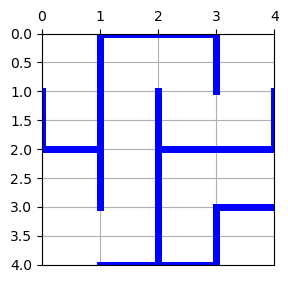

In [ ]:
maze_list = np.load('maze_list.npy')
maze = maze_list[0]
render_wall(maze.shape[0], maze)


In [4]:

grid_size = 4
n_agents = 2
n_action = 4
key = jax.random.PRNGKey(0)
# keys = jax.random.split(key, n_agent)
# start_location, env_state = jax.vmap(partial(reset, grid_size=grid_size))(keys)
wall_maze = jnp.repeat(maze_list[0].reshape(1,grid_size,grid_size,n_action), n_agents, axis=0)
env_state = {'wall_maze':wall_maze}
start_location, env_state = reset(grid_size=grid_size, key=key, n_agents=n_agents, env_state=env_state)
print(start_location)
print(env_state['goal_s'].shape)
print(env_state['reward_map'].shape)
print(env_state['start_s'].shape)
print(env_state['wall_maze'].shape)
s = start_location
n_action = 4


2024-10-08 11:32:18.085892: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


[[1 1]
 [2 1]]
(2, 2)
(2, 4, 4)
(2, 2)
(2, 4, 4, 4)


In [5]:
def render(goal_s, wall_maze, s, grid_size):
    fig, ax = plt.subplots(figsize=(3,3),frameon=True)
    ax.grid(visible=True)
    ax.set_xlim(0,grid_size)
    ax.set_ylim(grid_size,0)
    rect = mpl.patches.Rectangle((goal_s[1], goal_s[0]), width=1, height=1, facecolor='yellow')
    ax.add_patch(rect)
    circle = mpl.patches.Circle((s[1]+0.5, s[0]+0.5), radius=0.3, facecolor='red')
    ax.add_patch(circle)
    wall_loc = np.where(wall_maze==1)
    for i in range(len(wall_loc[0])):
        r, c, a = wall_loc[0][i], wall_loc[1][i], wall_loc[2][i] # already in matrix coordinates
        if a == 0:
            start_r = np.array([r+1, r+1])
            start_c = np.array([c, c+1])
        elif a == 1:
            start_r = np.array([r, r])
            start_c = np.array([c, c+1])
        elif a == 2:
            start_r = np.array([r, r+1])
            start_c = np.array([c+1, c+1])
        elif a == 3:
            start_r = np.array([r, r+1])
            start_c = np.array([c, c])
        line = mpl.lines.Line2D(start_c, start_r, color='blue', linewidth=5)
        ax.add_line(line)
    ax.xaxis.set_tick_params(bottom=False, top=True, labeltop=True, labelbottom=False)
    plt.show()

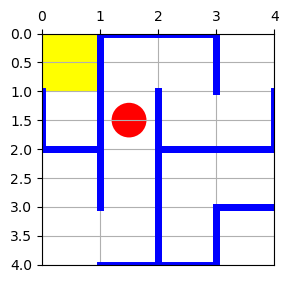

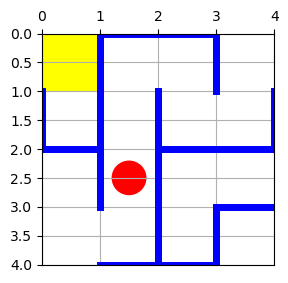

In [6]:
# render(env_state, s, grid_size)
for i in range(n_agents):
    render(env_state['goal_s'][i], env_state['wall_maze'][i], s[i], grid_size)

2024-10-08 11:32:21.435377: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


[[0 1]
 [1 1]] [[0]
 [0]] [[0]
 [0]] [[1 1]
 [2 1]]


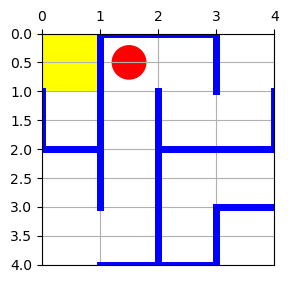

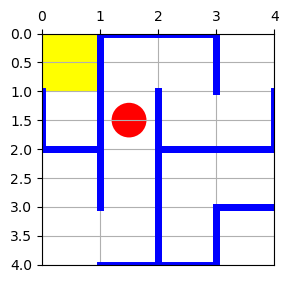

[[[0. 1. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]]]
[[0 2]
 [1 1]] [[0]
 [0]] [[0]
 [0]] [[1 1]
 [2 1]]


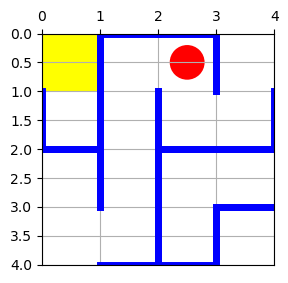

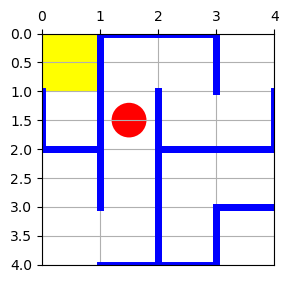

[[[0. 0. 1. 0.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]]]
[[1 2]
 [2 1]] [[0]
 [0]] [[0]
 [0]] [[1 1]
 [2 1]]


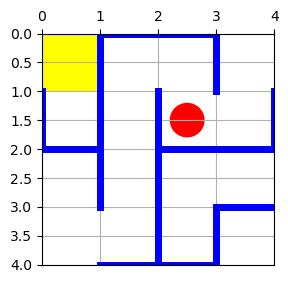

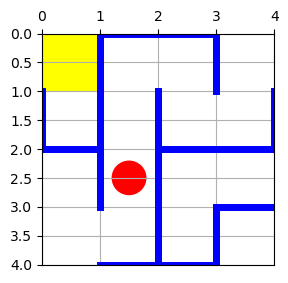

[[[0. 0. 0. 0.]
  [0. 2. 1. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]]]
[[1 3]
 [2 1]] [[0]
 [0]] [[0]
 [0]] [[1 1]
 [2 1]]


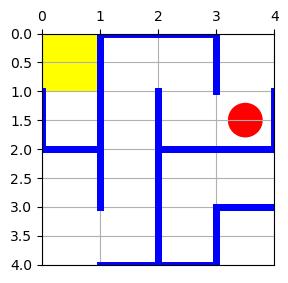

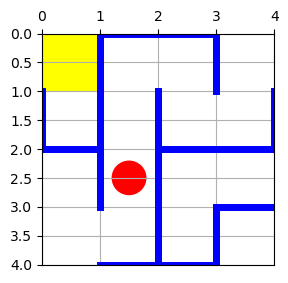

[[[0. 0. 0. 0.]
  [0. 2. 0. 1.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]]]
[[0 3]
 [1 1]] [[0]
 [0]] [[0]
 [0]] [[1 1]
 [2 1]]


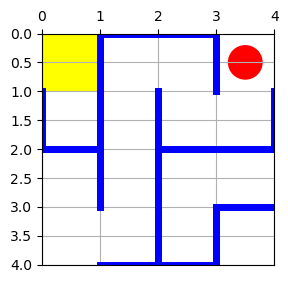

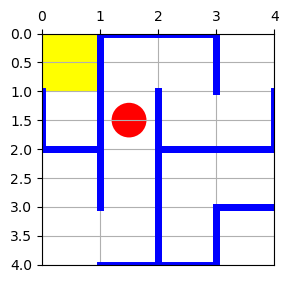

[[[0. 0. 0. 1.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]]]
[[0 1]
 [1 1]] [[1]
 [0]] [[1]
 [0]] [[0 1]
 [2 1]]


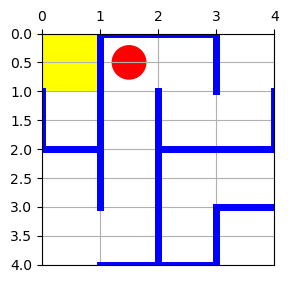

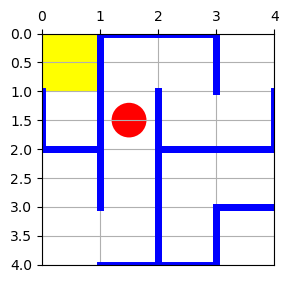

[[[0. 2. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]]]
[[1 1]
 [2 1]] [[0]
 [0]] [[0]
 [0]] [[0 1]
 [2 1]]


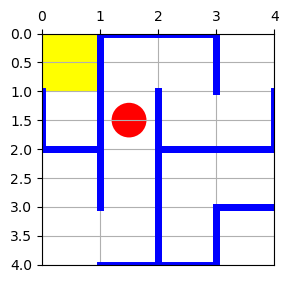

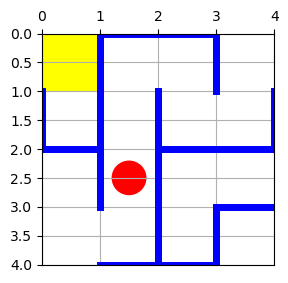

[[[0. 2. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 2. 0. 0.]
  [0. 0. 0. 0.]]]


In [7]:
s = env_state['start_s']
a_list = jnp.array([1,2,0,2,1,2,0]).reshape(-1,1,1).repeat(n_agents, axis=1)
for a in a_list:
    key, subkey = jax.random.split(key)
    next_s, reward, done, env_state = step(subkey, env_state, s, a)
    print(next_s, reward, env_state['done'], env_state['start_s'])
    
    for j in range(n_agents):
        render(env_state['goal_s'][j], env_state['wall_maze'][j], next_s[j], grid_size)
    obs = get_obs(env_state, next_s)
    s = next_s
    print(obs[...,-1])

In [4]:
grid_col, grid_row = jnp.meshgrid(jnp.arange(4), jnp.arange(4), indexing='xy')
pc_centers = jnp.concatenate((grid_row.reshape(-1, 1), grid_col.reshape(-1, 1)), axis=-1)
print(pc_centers)

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [3 0]
 [3 1]
 [3 2]
 [3 3]]


In [4]:
from flax.training import checkpoints
import os

d = {'a':1, 'b':2}
checkpoints.save_checkpoint('test', d, step=1, overwrite=True)
a = checkpoints.restore_checkpoint('test', None)
print(a)

{'a': 1, 'b': 2}


In [5]:
a=0.546
f'{a:.2f}'

'0.55'